In [13]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.datasets import make_regression
from statistics import mean
import matplotlib.pyplot as plt

In [14]:
class Data(Dataset):

    def __init__(self, samples = 200, features = 1):
        self.x, self.y = make_regression(n_samples = samples, n_features = features, noise = 20, random_state=0)
        self.x = torch.from_numpy(self.x.astype(np.float32))
        self.y = torch.from_numpy(self.y.astype(np.float32))
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

In [15]:
class model(nn.Module):
    
    def __init__(self, input_size, output_size):
        super(model, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [16]:
num_features = 4
data = Data(samples = 300, features = num_features)
loader = DataLoader(dataset = data, batch_size = 1, shuffle = True)

In [17]:
lr = 0.00001
start_weights = torch.tensor([[1.0,1.0,1.0,1.0]], requires_grad = True)
start_bias = torch.tensor([1.0], requires_grad = True)

lr_model = model(num_features, 1)
lr_model.state_dict()['linear.weight'][0] = start_weights
lr_model.state_dict()['linear.bias'][0] = start_bias

opt = optim.SGD(lr_model.parameters(), lr = lr)
criterion = nn.MSELoss()

print(list(lr_model.parameters()))

[Parameter containing:
tensor([[1., 1., 1., 1.]], requires_grad=True), Parameter containing:
tensor([1.], requires_grad=True)]


-------------------------
Epoch :  0
Loss for epoch :  3866.979103161022
-------------------------
Epoch :  100
Loss for epoch :  1440.7847933321543
-------------------------
Epoch :  200
Loss for epoch :  704.8674149970586
-------------------------
Epoch :  300
Loss for epoch :  480.10056837050865
-------------------------
Epoch :  400
Loss for epoch :  410.9507510890509
-------------------------
Epoch :  500
Loss for epoch :  389.52160111213567
-------------------------
Epoch :  600
Loss for epoch :  382.8288192122193
-------------------------
Epoch :  700
Loss for epoch :  380.7227474239538
-------------------------
Epoch :  800
Loss for epoch :  380.05581912827523
-------------------------
Epoch :  900
Loss for epoch :  379.84211702005007
-------------------------
Epoch :  1000
Loss for epoch :  379.77288978989236


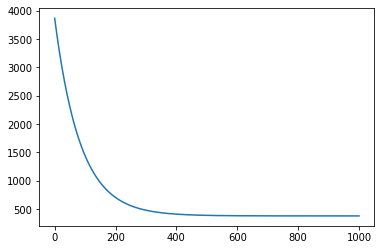

In [18]:
epochs = 1000
mean_loss_list = []

for i in range(epochs + 1):
    loss_list = []
    for x,y in loader :

        opt.zero_grad()
        prediction = lr_model.forward(x)

        loss = criterion(prediction, y)
        loss_list.append(loss.item())
        loss.backward()

        opt.step()

    mean_loss = mean(loss_list)
    mean_loss_list.append(mean_loss)
    if i % (epochs/10) == 0 :
        
        print('-' * 25)
        print('Epoch : ', i)
        print('Loss for epoch : ', mean_loss)

plt.plot(mean_loss_list)
plt.show()